# Task : 02

#### Name : Uzair Raees

#### GRIPJUNE23

###### Exploratory Data Analysis On "Global Terrorism Dataset"

###### Problem Statement : As a Security/Defense Analyst, try to find out the hot zone of terrorism.

In [1]:
#Importing all the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
#importing the file

df = pd.read_csv("C:\data\globalterrorism.csv", encoding='latin1')

In [3]:
#Understanding the data

df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


###### let's see how many rows and columns are there in the dataset.


In [4]:
df.shape

(181691, 135)

### Now let's see the total columns and their names in the dataset.

In [5]:
df.columns.to_numpy()

array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'in

### Let's see how many unique columns this dataset contains.

In [6]:
unique_columns = df.columns.nunique()
print("There are total %d unique columns in the data" %unique_columns)

There are total 135 unique columns in the data


In [7]:
df.select_dtypes(include='object').nunique()

approxdate              2244
resolution              1859
country_txt              205
region_txt                12
provstate               2855
city                   36673
location               44109
summary               112492
alternative_txt            5
attacktype1_txt            9
attacktype2_txt            9
attacktype3_txt            8
targtype1_txt             22
targsubtype1_txt         112
corp1                  33237
target1                86005
natlty1_txt              215
targtype2_txt             22
targsubtype2_txt         107
corp2                   2691
target2                 5043
natlty2_txt              158
targtype3_txt             20
targsubtype3_txt          92
corp3                    422
target3                  720
natlty3_txt              110
gname                   3537
gsubname                1183
gname2                   433
gsubname2                 60
gname3                   116
gsubname3                 14
motive                 14490
claimmode_txt 

## We will use the following columns for the Analysis :
1. Year
2. Month
3. Day
4. Country
5. Region
6. State
7. City
8. Attack Type
9. Target Type
10. Target subtype
11. Gang name
12. Weapon type 

### Renaming the above mentioned columns.

In [8]:
df = df.rename(columns =
                  {
                      'iyear' : 'Year',
                      'imonth' : 'Month',
                      'iday' : 'Day',
                      'country_txt' : 'Country',
                      'region_txt' : 'Region',
                      'provstate' : 'State',
                      'city' : 'City',
                      'attacktype1_txt' : 'Attack_Type',
                      'targtype1_txt' : 'Target_Type',
                      'targsubtype1_txt' : 'Target_subtype',
                      'gname' : 'Gang_Name',
                      'weaptype1_txt' : 'Weapon_type'
                      
                  })

df

,eventid,Year,Month,Day,approxdate,extended,resolution,country,Country,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN


## As you can see in the data, there are a lot of NaN values. Let's fill these NaN values with 'Others' and 'Unknown'

In [9]:
df['Target_subtype'] = df['Target_subtype'].fillna('Others')

# Filling the NaN values in state column as Unknown

df['State'] = df['State'].fillna('Unknown')

# Filling the NaN values in city column as Unknown

df['City'] = df['City'].fillna('Unknown')

df.replace( {"Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)": "Vehicle"},inplace = True)

### Checking how many columns are left with NaN values so that we can drop it.

In [10]:
s = df.isnull().apply(sum, axis=0)
print(s.to_numpy())

[     0      0      0      0 172452      0 179471      0      0      0
      0      0      0   4556   4557      6      0 126196  66129      0
      0      0      1 152680 152680      1      0      0      0      0
 175377 175377 181263 181263      0      0  10373      0  42552    638
   1559   1559 170547 170547 171006 171006 171574 170671 170863 170863
 180515 180515 180594 180594 180665 180516 180544 180544      0 175801
 179678 181531 181367 181671 131130    380 179736 181371      0  71115
  69489  66120 162608 162608 179801 181075 181075 181373 181558 181558
 176852      0      0  20768  20768 168564 168564 170149 170149 179828
 179828 179998 179998 181618 181618 181621 181621  67670  10313  64446
  66958  16311  64702  69143      0 117626 117626 142702 123732    178
 168119 168174 177628 173567 181367 178386 104310 180341 181128 180917
 181139 181179 170700 170700 171291 153402  66191 104758 138175      0
      0      0      0      0 156653]


In [11]:
for col in df:
    if s[col] >= 1:
        del df[col]

In [12]:
print(df.isnull().sum())

eventid           0
Year              0
Month             0
Day               0
extended          0
country           0
Country           0
region            0
Region            0
State             0
City              0
vicinity          0
crit1             0
crit2             0
crit3             0
success           0
suicide           0
attacktype1       0
Attack_Type       0
targtype1         0
Target_Type       0
Target_subtype    0
Gang_Name         0
individual        0
weaptype1         0
Weapon_type       0
property          0
dbsource          0
INT_LOG           0
INT_IDEO          0
INT_MISC          0
INT_ANY           0
dtype: int64


In [13]:
df.shape

(181691, 32)

In [14]:
df

,eventid,Year,Month,Day,extended,country,Country,region,Region,State,...,Gang_Name,individual,weaptype1,Weapon_type,property,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
0,197000000001,1970,7,2,0,58,Dominican Republic,2,Central America & Caribbean,Unknown,...,MANO-D,0,13,Unknown,0,PGIS,0,0,0,0
1,197000000002,1970,0,0,0,130,Mexico,1,North America,Federal,...,23rd of September Communist League,0,13,Unknown,0,PGIS,0,1,1,1
2,197001000001,1970,1,0,0,160,Philippines,5,Southeast Asia,Tarlac,...,Unknown,0,13,Unknown,0,PGIS,-9,-9,1,1
3,197001000002,1970,1,0,0,78,Greece,8,Western Europe,Attica,...,Unknown,0,6,Explosives,1,PGIS,-9,-9,1,1
4,197001000003,1970,1,0,0,101,Japan,4,East Asia,Fukouka,...,Unknown,0,8,Incendiary,1,PGIS,-9,-9,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,201712310022,2017,12,31,0,182,Somalia,11,Sub-Saharan Africa,Middle Shebelle,...,Al-Shabaab,0,5,Firearms,-9,START Primary Collection,0,0,0,0
181687,201712310029,2017,12,31,0,200,Syria,10,Middle East & North Africa,Lattakia,...,Muslim extremists,0,6,Explosives,1,START Primary Collection,-9,-9,1,1
181688,201712310030,2017,12,31,0,160,Philippines,5,Southeast Asia,Maguindanao,...,Bangsamoro Islamic Freedom Movement (BIFM),0,8,Incendiary,1,START Primary Collection,0,0,0,0
181689,201712310031,2017,12,31,0,92,India,6,South Asia,Manipur,...,Unknown,0,6,Explosives,-9,START Primary Collection,-9,-9,0,-9


### Removing unneccessary columns

In [15]:
column_to_drop = ['individual','INT_IDEO','INT_LOG','INT_MISC','INT_ANY']
df = df.drop(column_to_drop, axis=1)

In [16]:
df.shape


(181691, 27)

### Let's look at the unique value of the columns now

In [17]:
df.columns.unique()

Index(['eventid', 'Year', 'Month', 'Day', 'extended', 'country', 'Country',
       'region', 'Region', 'State', 'City', 'vicinity', 'crit1', 'crit2',
       'crit3', 'success', 'suicide', 'attacktype1', 'Attack_Type',
       'targtype1', 'Target_Type', 'Target_subtype', 'Gang_Name', 'weaptype1',
       'Weapon_type', 'property', 'dbsource'],
      dtype='object')

### Number of countries in the dataset

In [18]:
total_countries = df['Country'].nunique()
print("There are total %d countries in the dataset" %total_countries)

There are total 205 countries in the dataset


### Number of Regions in the dataset

In [19]:
total_regions = df['Region'].nunique()
print("There are %d regions in the dataset" %total_regions)

There are 12 regions in the dataset


### Top 10 Regions

In [20]:
df['Region'].value_counts().head(10)

Region
Middle East & North Africa     50474
South Asia                     44974
South America                  18978
Sub-Saharan Africa             17550
Western Europe                 16639
Southeast Asia                 12485
Central America & Caribbean    10344
Eastern Europe                  5144
North America                   3456
East Asia                        802
Name: count, dtype: int64

### Top 10 State

In [21]:
df['State'].value_counts().head(10)

State
Baghdad               7645
Unknown               4711
Northern Ireland      4498
Balochistan           3710
Saladin               3411
Al Anbar              3299
Nineveh               3241
Sindh                 3206
Khyber Pakhtunkhwa    3084
Diyala                3041
Name: count, dtype: int64

### Top 10 Attack type

In [22]:
df['Attack_Type'].value_counts().head(10)

Attack_Type
Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: count, dtype: int64

### Top 10 Target type

In [23]:
df['Target_Type'].value_counts().head(10)

Target_Type
Private Citizens & Property       43511
Military                          27984
Police                            24506
Government (General)              21283
Business                          20669
Transportation                     6799
Utilities                          6023
Unknown                            5898
Religious Figures/Institutions     4440
Educational Institution            4322
Name: count, dtype: int64

### Top 10 Gangs


In [24]:
df['Gang_Name'].value_counts().head(10)

Gang_Name
Unknown                                             82782
Taliban                                              7478
Islamic State of Iraq and the Levant (ISIL)          5613
Shining Path (SL)                                    4555
Farabundo Marti National Liberation Front (FMLN)     3351
Al-Shabaab                                           3288
New People's Army (NPA)                              2772
Irish Republican Army (IRA)                          2671
Revolutionary Armed Forces of Colombia (FARC)        2487
Boko Haram                                           2418
Name: count, dtype: int64

### Top 10 Weapons

In [25]:
df['Weapon_type'].value_counts().head(10)

Weapon_type
Explosives            92426
Firearms              58524
Unknown               15157
Incendiary            11135
Melee                  3655
Chemical                321
Sabotage Equipment      141
Vehicle                 136
Other                   114
Biological               35
Name: count, dtype: int64

# Now let us find out the hot zones of attack through visualization.

<Axes: xlabel='Weapon_type'>

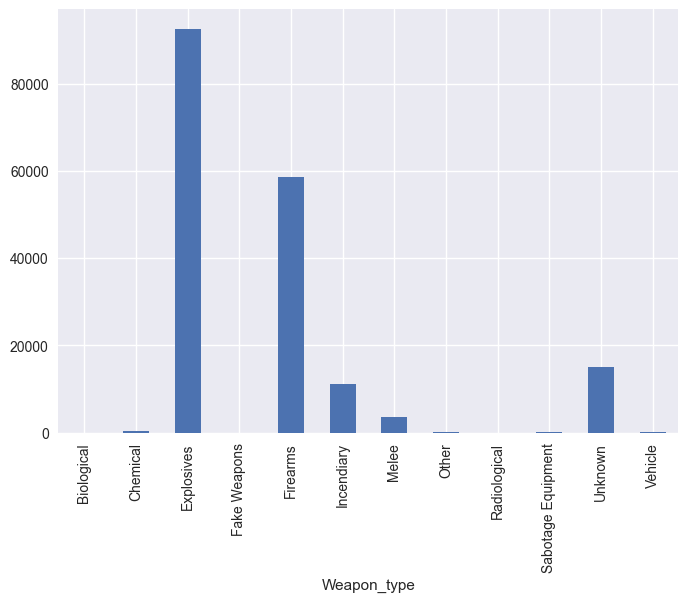

In [44]:
df.groupby('Weapon_type').size().plot(kind='bar')

<Axes: xlabel='Region', ylabel='count'>

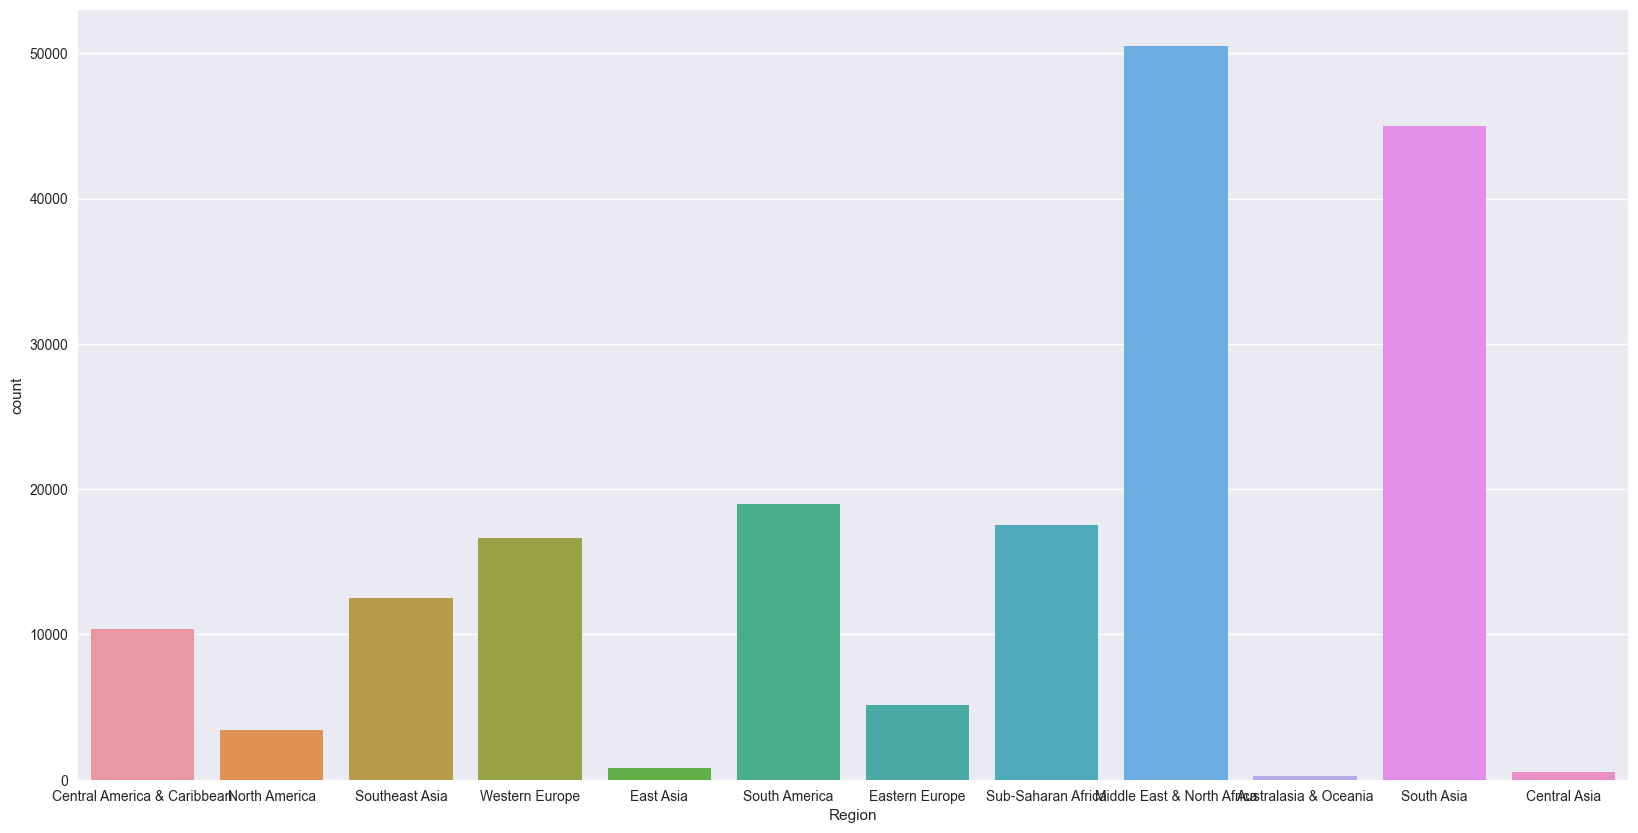

In [43]:
plt.figure(figsize=(20,10))
sns.countplot(x=df.Region)

<Axes: title={'center': 'Attacks By Year'}, xlabel='Year', ylabel='count'>

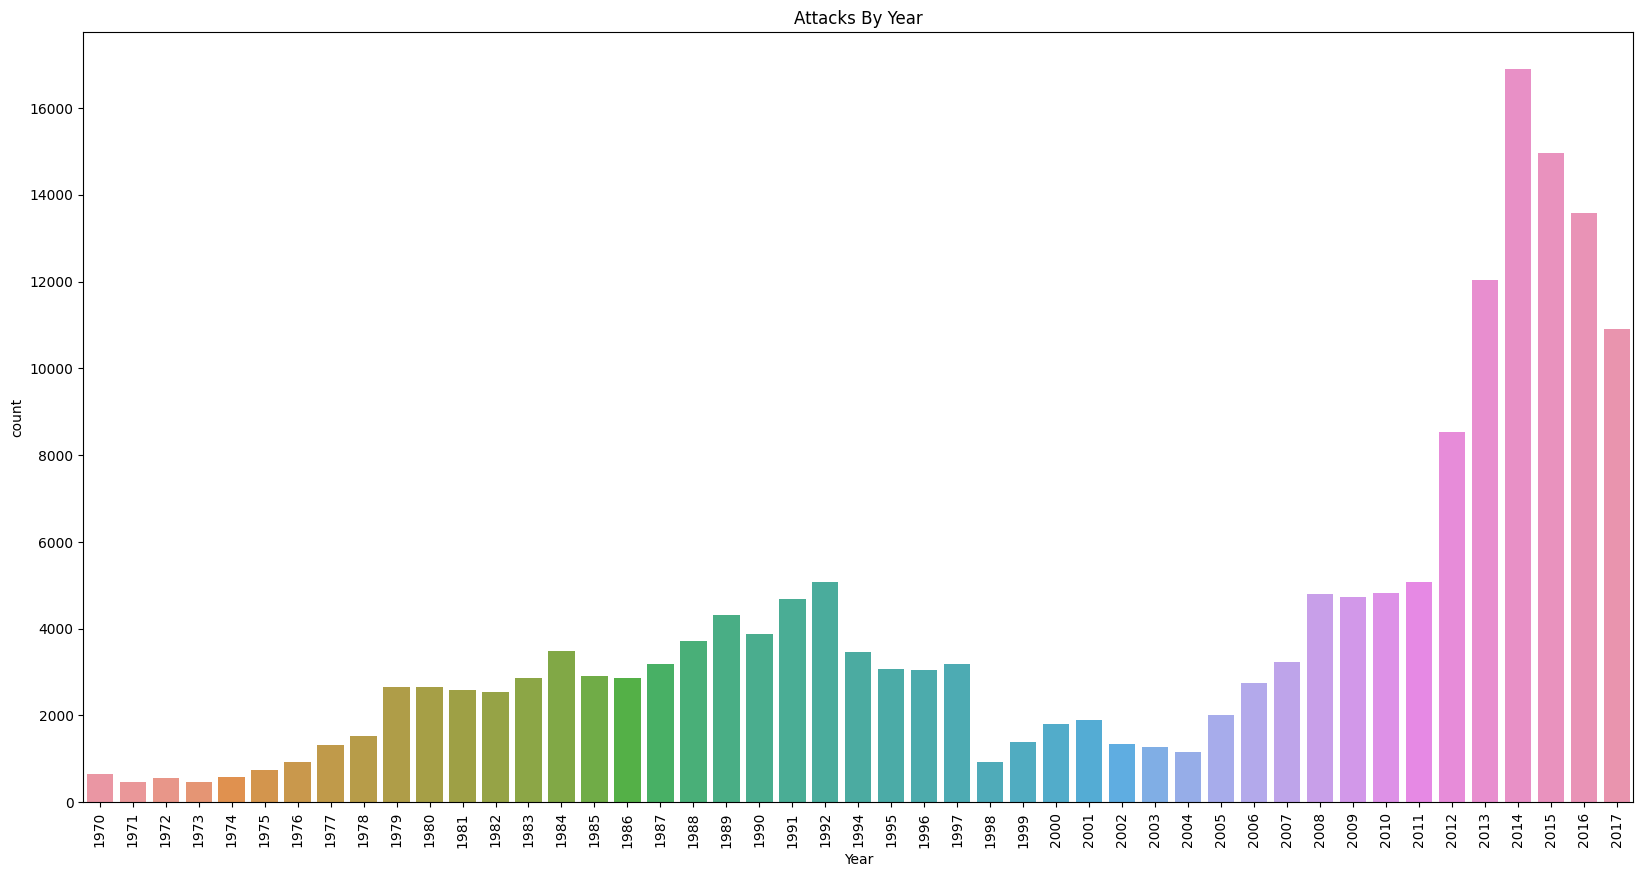

In [31]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
plt.title('Attacks By Year')
sns.countplot(x=df.Year)

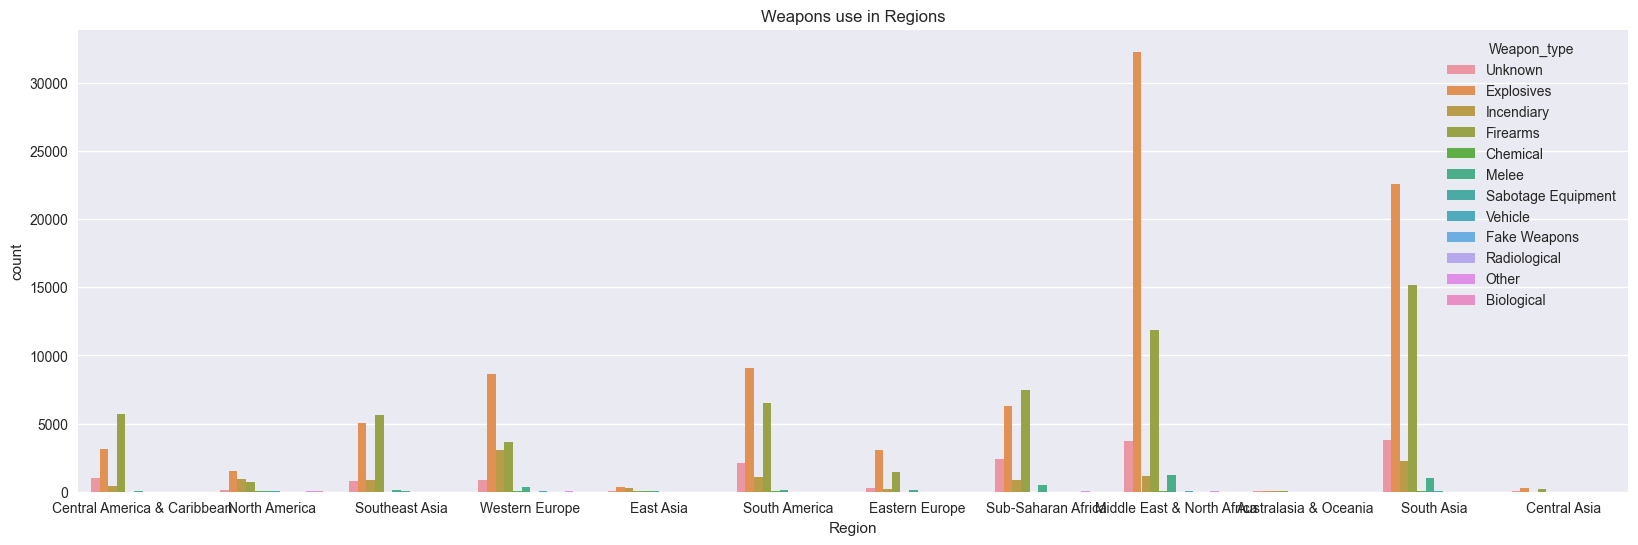

In [42]:
sns.countplot(x='Region' ,hue='Weapon_type' ,data=df)

fig=plt.gcf()
fig.set_size_inches(20,6)
plt.title('Weapons use in Regions')
plt.show()